# Q1. Monte Carlo: Ising Model

In [52]:
import numpy as np
import matplotlib.pyplot as plt

## Configuration preparation

In [53]:
def config(rows,cols):
  '''
  Setup initial configuration of 2D lattice

  A = lattice
  rows = number of rows
  cols = number of columns
  '''
  return np.random.choice([-1, 1], size=(rows, cols))


## Site energy

In [54]:
def cal_lattice_site_energy(A,i,j):
  '''
  For [i][j] element of 2D matrix nearest neighbour are i-1,i+1,j-1,j+1

  For periodic condition using modulo operator to find nearest neighbour
  '''

  rows, cols = A.shape
  up = A[(i - 1) % rows][j]
  down = A[(i + 1) % rows][j]
  left = A[i][(j - 1) % cols]
  right = A[i][(j + 1) % cols]
  '''
  using formula E = - $\sum_{nn} s_{i}*s_{j}$
  '''

  site = - A[i][j]*(up+down+left+right)

  return site

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3190061344.py:14: SyntaxWarning: invalid escape sequence '\s'
  using formula E = - $\sum_{nn} s_{i}*s_{j}$


## Total lattice energy

In [55]:
def cal_total_energy_of_lattice(A):

  rows, cols = A.shape

  energy = 0
  for i in range(rows):
    for j in range(cols):
      energy += cal_lattice_site_energy(A,i,j)

  return energy/2

## Monte-Carlo implementation
$$P_\left[{s}\right] = \sum_{nn}\exp({-\beta s_{i}s_{j}})$$

In [56]:
def monte_carlo(A, T):
  rows, cols = A.shape
  for _ in range(rows*cols):
    i = np.random.randint(0, rows)
    j = np.random.randint(0, cols)
    '''
    calculating change in energy of [i][j] for +1/-1

    if delta_E reduces we accept the change
    otherwise we accept with probability exp(-beta*delta_E)
    '''
    delta_E = - 2 * cal_lattice_site_energy(A, i, j)
    if delta_E <= 0:
        A[i][j] *= -1
    else:
        if np.random.uniform(0, 1) < np.exp(-(1/T) * delta_E):
            A[i][j] *= -1
  return A

## Report

In [57]:
def report(A, T, N_steps):
  total_energy_list = []
  A_list = []

  for step in range(N_steps):
    monte_carlo(A, T)

    if step % 100 == 0:
        total_energy_list.append(cal_total_energy_of_lattice(A))
        A_list.append(A.copy())

  return total_energy_list, A_list

# 4x4 lattice

### T = 1

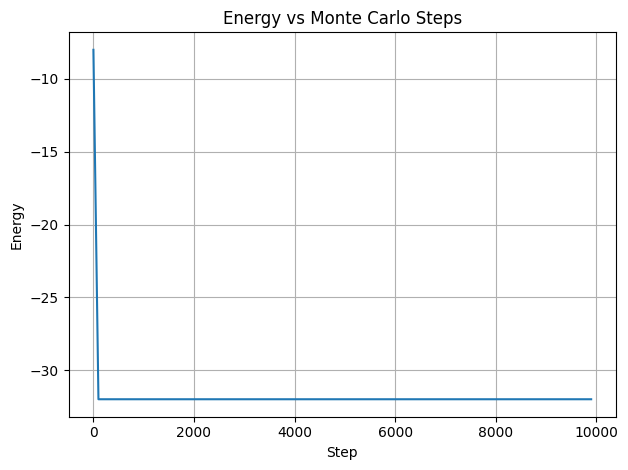

In [58]:
rows, cols = 4, 4
T = 1
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

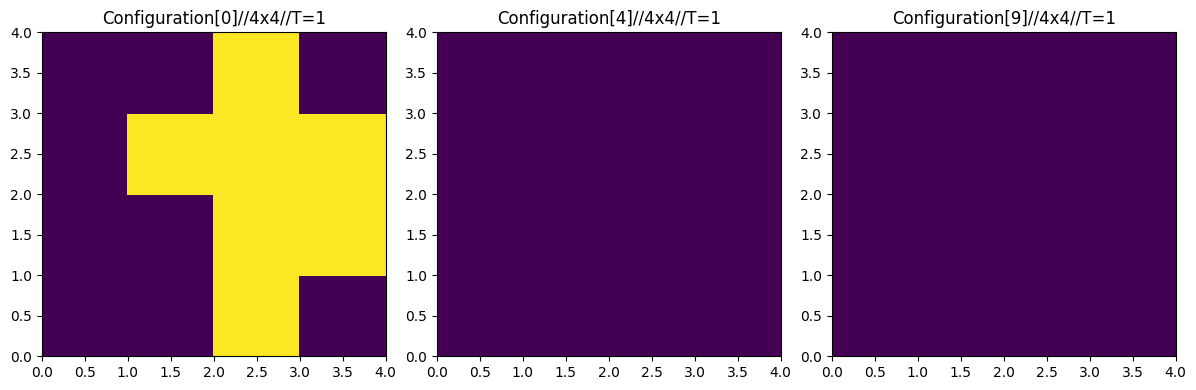

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//4x4//T=1")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//4x4//T=1")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//4x4//T=1")

plt.tight_layout()
save_dir = '4x4/T=1'
plt.savefig('configurations4x4.png')
plt.show()

### T = 2

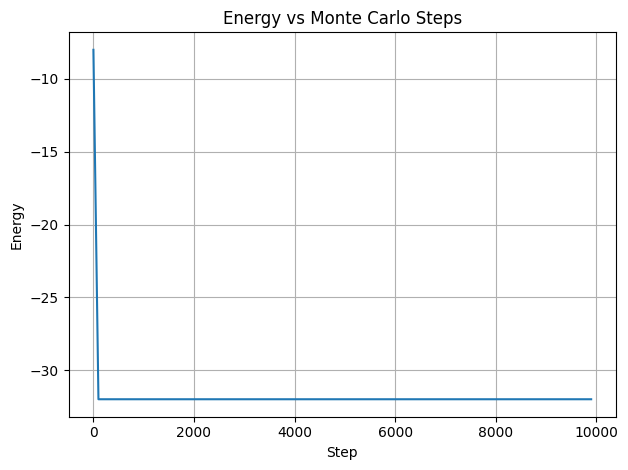

In [64]:
rows, cols = 4, 4
T = 1
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

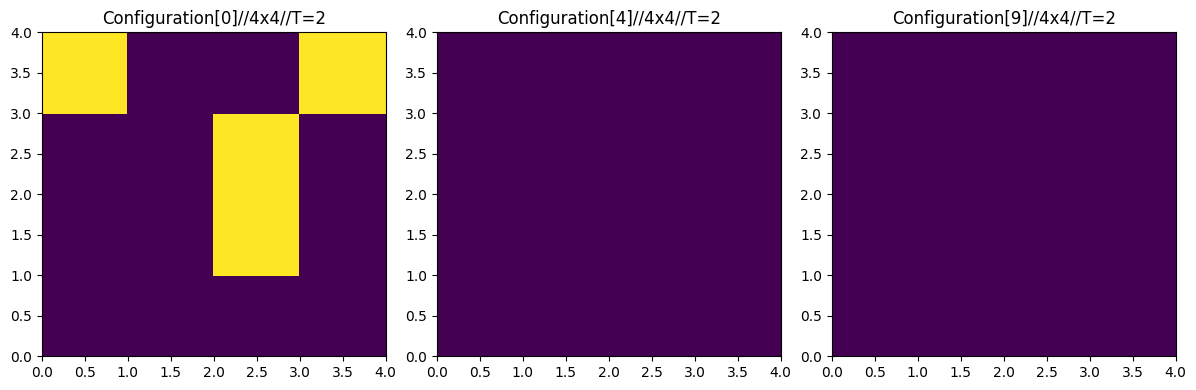

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//4x4//T=2")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//4x4//T=2")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//4x4//T=2")

plt.tight_layout()
plt.savefig('4x4_T=2.png')
plt.show()

### T = 3

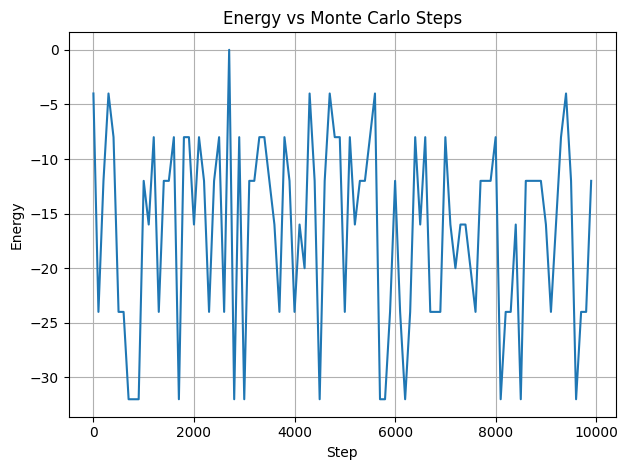

In [68]:
rows,cols = 4,4
T = 3
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)
plt.tight_layout()
plt.show()

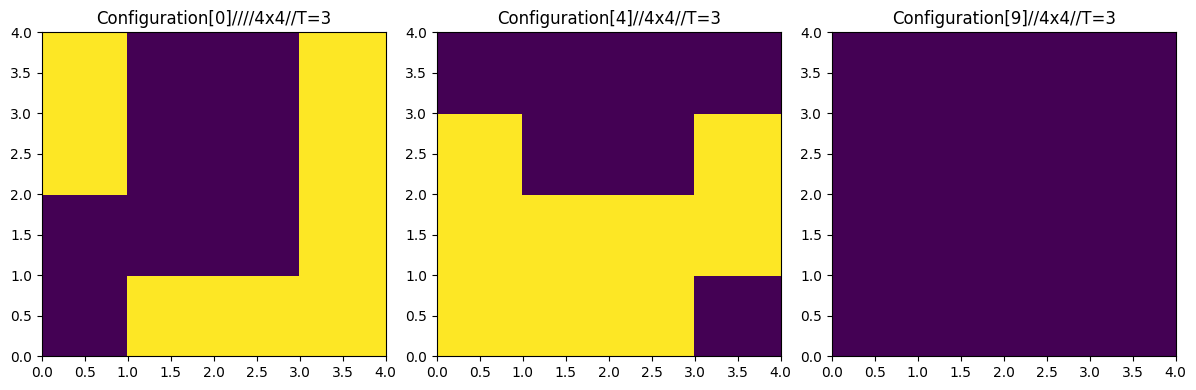

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]////4x4//T=3")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//4x4//T=3")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//4x4//T=3")

plt.tight_layout()
plt.savefig('4x4_T=3')
plt.show()

# 8x8 lattice

### T = 1

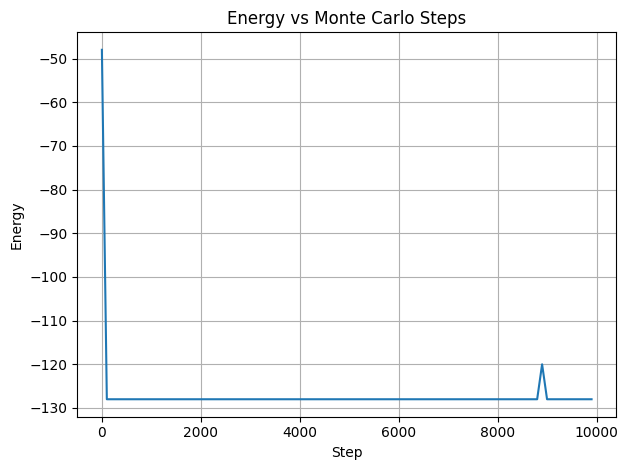

In [71]:
rows,cols = 8,8
T = 1
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

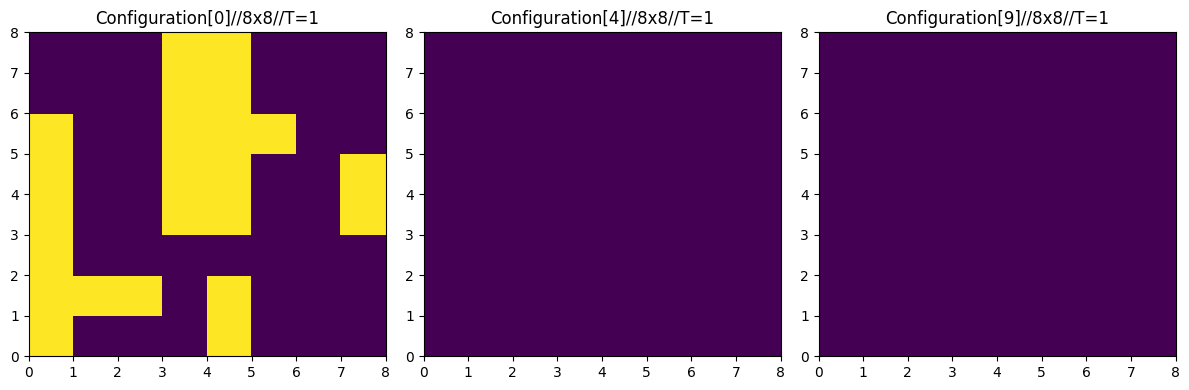

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//8x8//T=1")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//8x8//T=1")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//8x8//T=1")

plt.tight_layout()
plt.savefig('8x8_T=1')
plt.show()

### T = 2

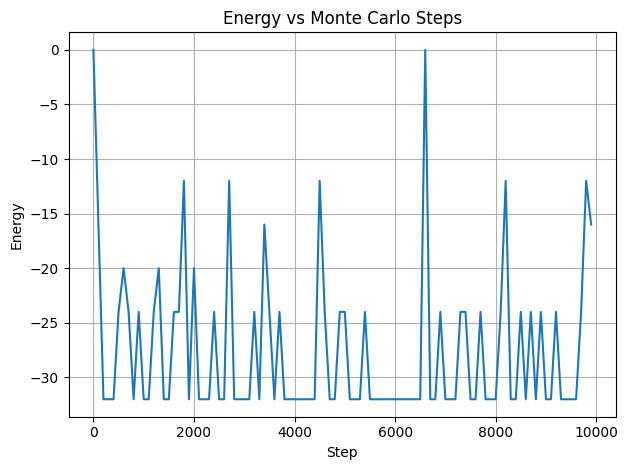

In [73]:
rows,cols = 4,4
T = 2
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

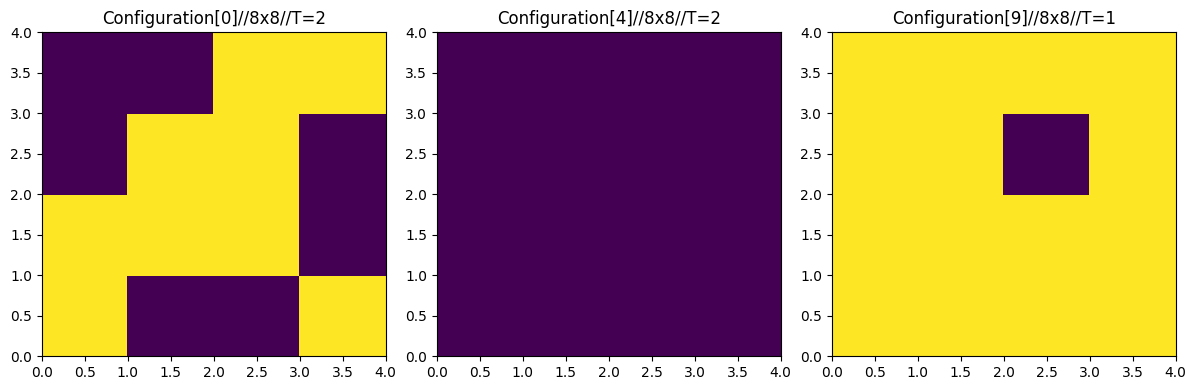

In [74]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//8x8//T=2")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//8x8//T=2")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//8x8//T=1")

plt.tight_layout()
plt.savefig('8x8_T=2')
plt.show()

### T = 3

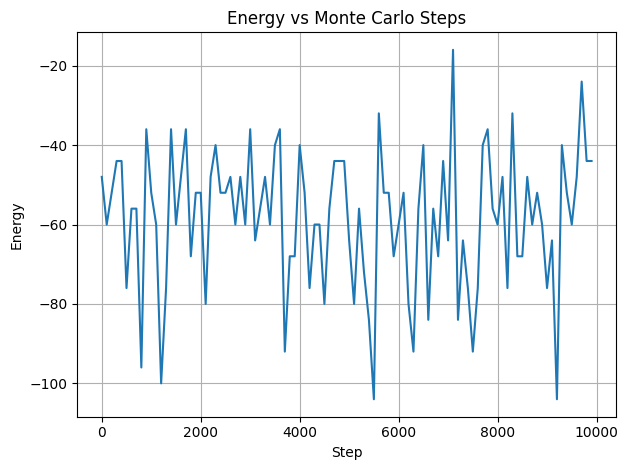

In [75]:
rows,cols = 8,8
T = 3
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

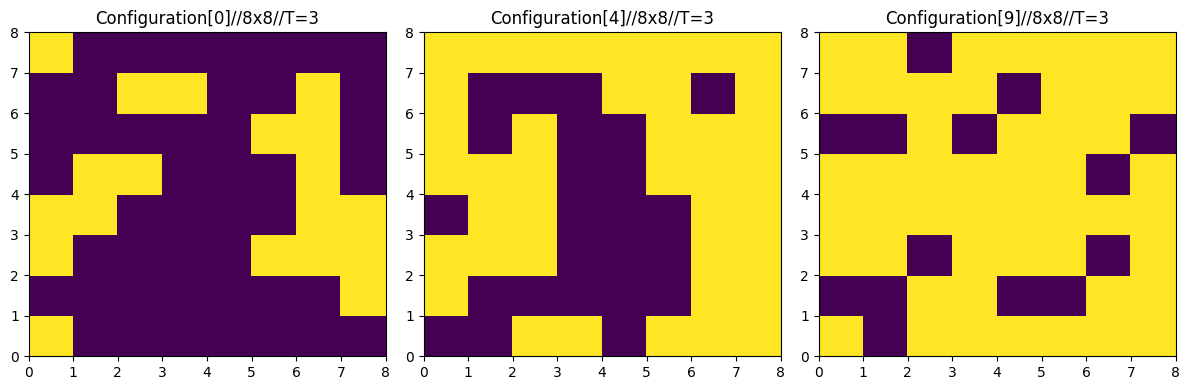

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//8x8//T=3")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//8x8//T=3")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//8x8//T=3")

plt.tight_layout()
plt.savefig('8x8_T=3')
plt.show()

# 12x12 lattice

### T = 1

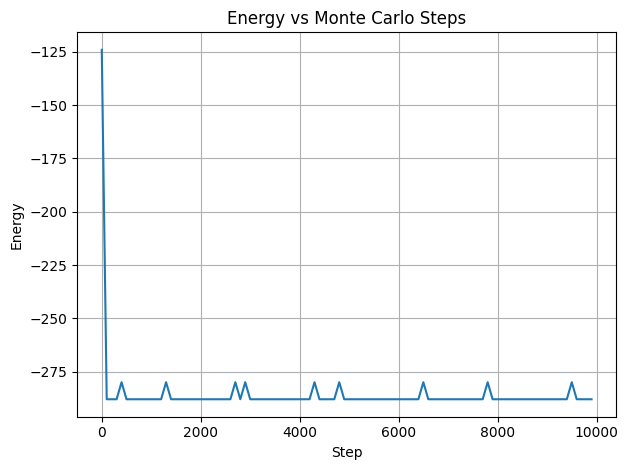

In [77]:
rows,cols = 12,12
T = 1
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

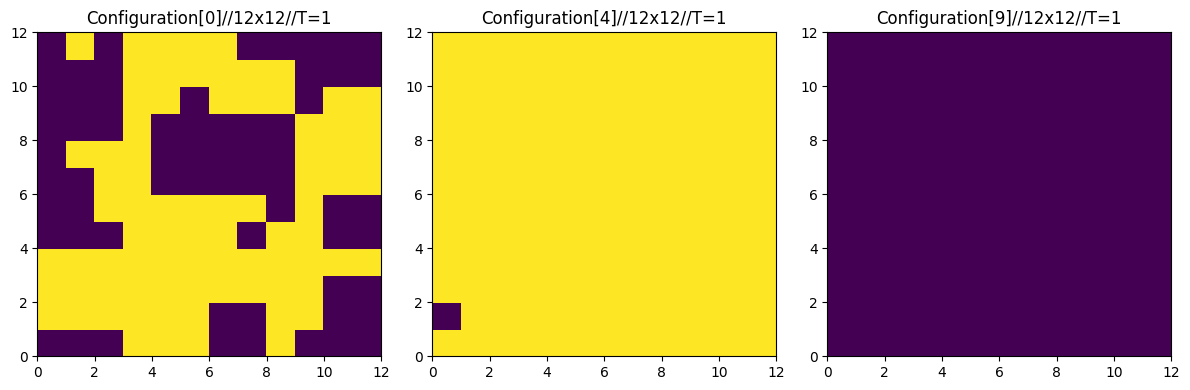

In [78]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//12x12//T=1")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//12x12//T=1")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//12x12//T=1")

plt.tight_layout()
plt.savefig('12x12_T=1')
plt.show()

### T = 2

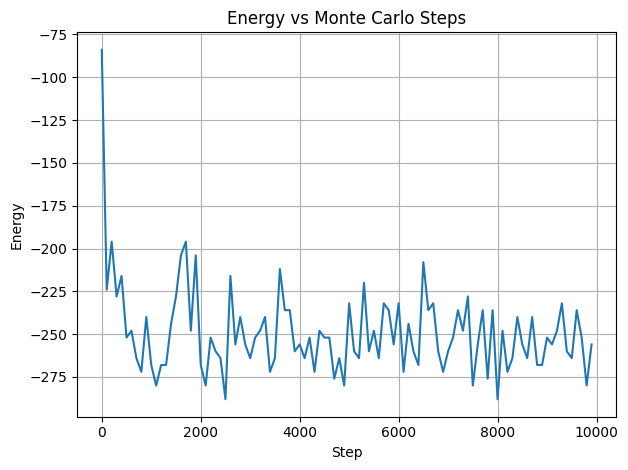

In [79]:
rows,cols = 12,12
T = 2
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

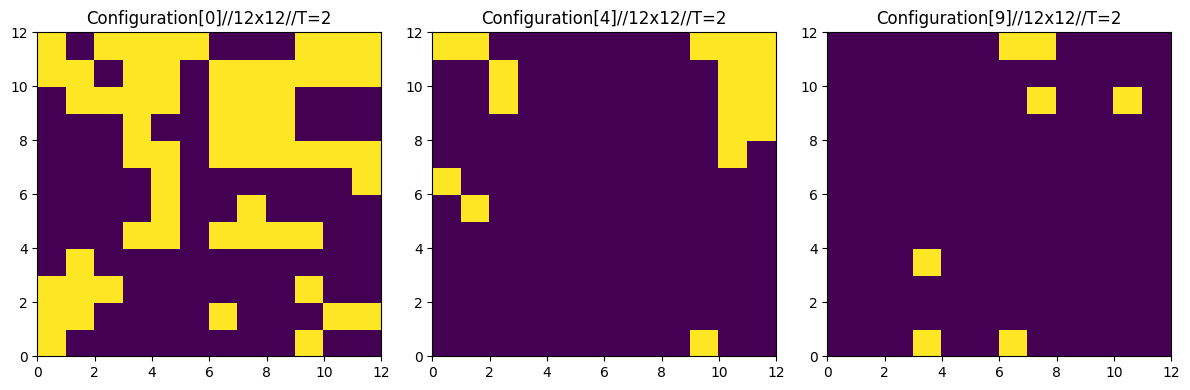

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//12x12//T=2")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//12x12//T=2")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//12x12//T=2")

plt.tight_layout()
plt.savefig('12x12_T=2')
plt.show()

### T = 3

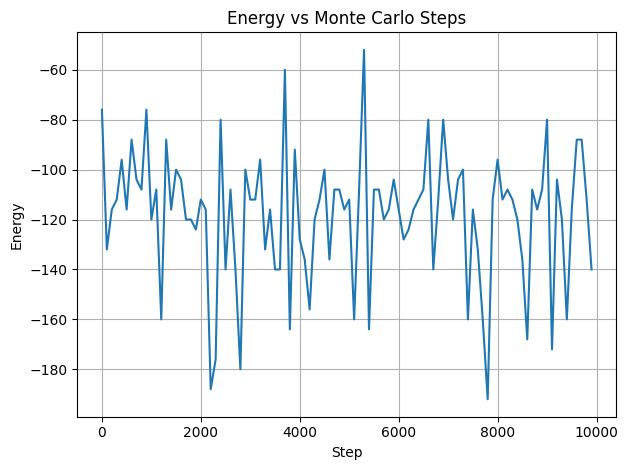

In [81]:
rows,cols = 12,12
T = 3
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

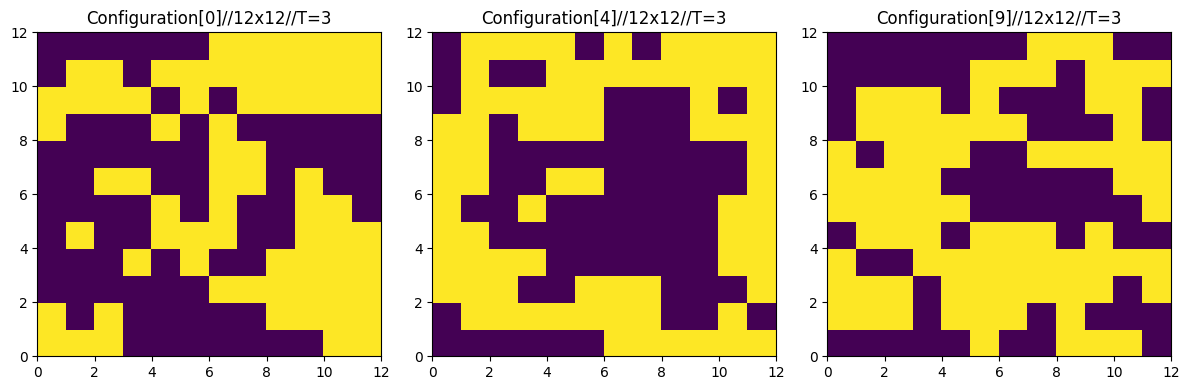

In [83]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//12x12//T=3")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//12x12//T=3")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//12x12//T=3")

plt.tight_layout()
plt.savefig('12x12_T=3')
plt.show()

# Specific Heat ($C_{v}$)

In [ ]:
def cal_sp_heat(T, total_energy_list):
  '''
  using formula cv = (1/T**2) * (mean(E**2) - mean(E)**2)
  '''

  cv = (1 / (T**2)) * (np.mean(np.square(total_energy_list)) - np.mean(total_energy_list)**2)
  return cv


In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_4 = []

for T in T_list:
  rows,cols = 4,4
  N_steps = N_step_eq = 10000

  N_steps_report = 20000
  lattice = config(rows, cols)

  for step in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_4, A_list_4 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_4 = cal_sp_heat(T, total_energy_list_4)
  cv_list_4.append(specific_heat_4)
  print(f"T = {T:.2f}, specific heat = {specific_heat_4}")

T = 0.50, specific heat = 0.0
T = 0.74, specific heat = 0.0
T = 0.97, specific heat = 0.0
T = 1.21, specific heat = 0.9147153119092934
T = 1.45, specific heat = 1.5878749090909803
T = 1.68, specific heat = 5.955230859374944
T = 1.92, specific heat = 8.298081891536906
T = 2.16, specific heat = 11.668052587745366
T = 2.39, specific heat = 11.730211327134425
T = 2.63, specific heat = 10.78402304000001
T = 2.87, specific heat = 11.530366130797074
T = 3.11, specific heat = 7.766778626831372
T = 3.34, specific heat = 7.462746704693411
T = 3.58, specific heat = 5.7632275951557075
T = 3.82, specific heat = 3.3955462544589783
T = 4.05, specific heat = 3.5437304098498905
T = 4.29, specific heat = 3.2239858481689194
T = 4.53, specific heat = 2.4114370470524613
T = 4.76, specific heat = 2.3737824364335647
T = 5.00, specific heat = 2.021824


In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_8 = []

for T in T_list:
  rows,cols = 8,8
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_8, A_list_8 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_8 = cal_sp_heat(T, total_energy_list_8)
  cv_list_8.append(specific_heat_8)
  print(f"T = {T:.2f}, specific heat = {specific_heat_8}")

T = 0.50, specific heat = 0.0
T = 0.74, specific heat = 0.0
T = 0.97, specific heat = 0.6683114682241438
T = 1.21, specific heat = 3.5373905482043613
T = 1.45, specific heat = 10.982228628098408
T = 1.68, specific heat = 22.56870468750037
T = 1.92, specific heat = 37.48482011634413
T = 2.16, specific heat = 66.10238572278433
T = 2.39, specific heat = 76.35089404661278
T = 2.63, specific heat = 51.26870016000004
T = 2.87, specific heat = 41.05554158740849
T = 3.11, specific heat = 35.15673323757549
T = 3.34, specific heat = 21.483862260524518
T = 3.58, specific heat = 14.283077422145332
T = 3.82, specific heat = 14.730269755053527
T = 4.05, specific heat = 9.875898127846185
T = 4.29, specific heat = 9.03913890624413
T = 4.53, specific heat = 8.018124337479726
T = 4.76, specific heat = 6.946221372973956
T = 5.00, specific heat = 5.176576


In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_12 = []

for T in T_list:
  rows,cols = 12,12
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_12, A_list_12 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_12 = cal_sp_heat(T, total_energy_list_12)
  cv_list_12.append(specific_heat_12)
  print(f"T = {T:.2f}, specific heat = {specific_heat_12}")

T = 0.50, specific heat = 0.0
T = 0.74, specific heat = 0.0
T = 0.97, specific heat = 2.3757966398805723
T = 1.21, specific heat = 12.219133459356069
T = 1.45, specific heat = 23.996845487600428
T = 1.68, specific heat = 40.24642343749212
T = 1.92, specific heat = 86.2932665790945
T = 2.16, specific heat = 156.29826793575427
T = 2.39, specific heat = 201.57061224489786
T = 2.63, specific heat = 128.6730494400004
T = 2.87, specific heat = 79.49421146368174
T = 3.11, specific heat = 57.92389669635162
T = 3.34, specific heat = 42.16329592659192
T = 3.58, specific heat = 30.644996453287295
T = 3.82, specific heat = 29.706744085612474
T = 4.05, specific heat = 22.799953853938295
T = 4.29, specific heat = 17.39656676577964
T = 4.53, specific heat = 14.935110816657676
T = 4.76, specific heat = 14.46351937975033
T = 5.00, specific heat = 14.216816000000017


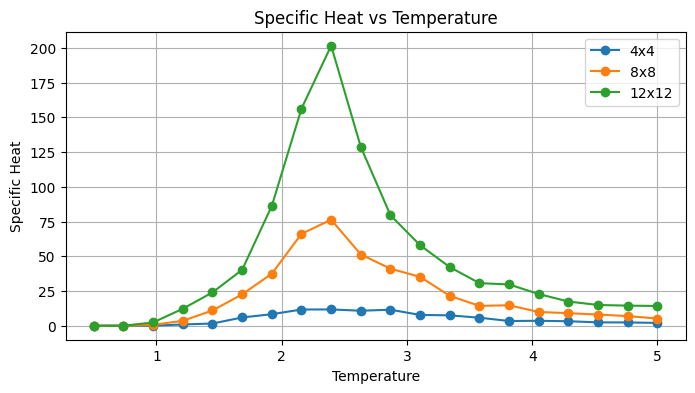

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(T_list, cv_list_4, marker='o', linestyle='-', label = '4x4')
plt.plot(T_list, cv_list_8, marker='o', linestyle='-', label = '8x8' )
plt.plot(T_list, cv_list_12, marker='o', linestyle='-', label = '12x12')
plt.title("Specific Heat vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.legend()
plt.grid(True)
plt.savefig('4x4,8x8,12x12')
plt.show()

# 50x50 lattice

### T =1

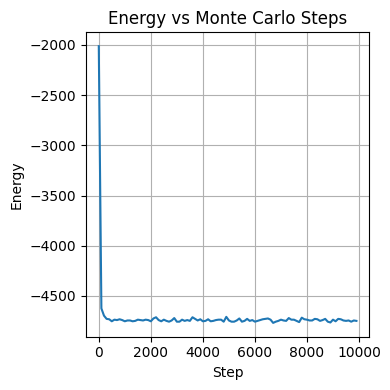

In [ ]:
rows,cols = 50,50
T = 1
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.figure(figsize=(4,4))
plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

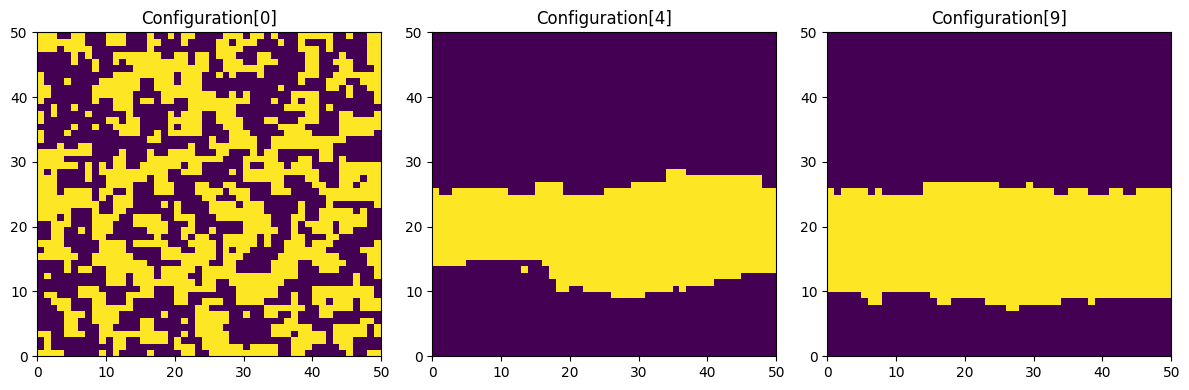

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//50x50//T=1")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//50x50//T=1")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//50x50//T=1")

plt.tight_layout()
plt.savefig('50x50//T=1')
plt.show()

### T = 2

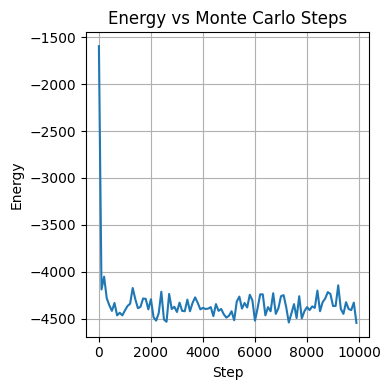

In [ ]:
rows,cols = 50,50
T = 2
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.figure(figsize=(4,4))
plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

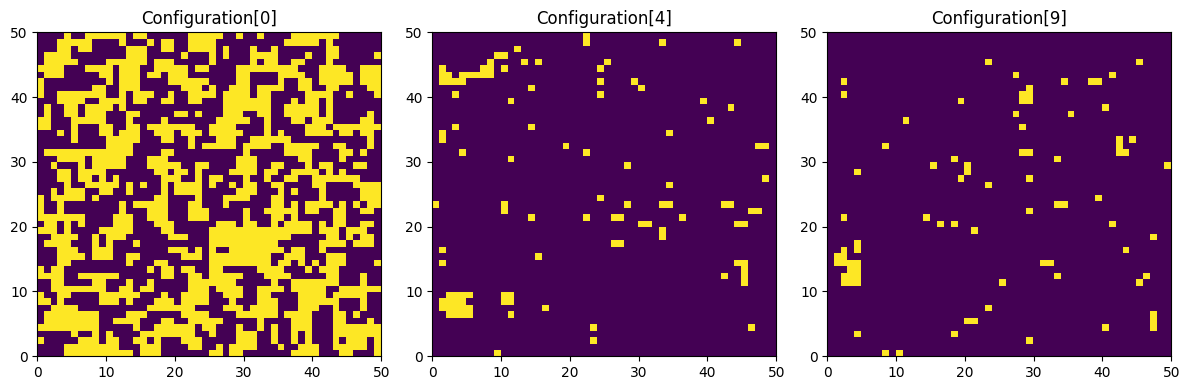

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//50x50//T=2")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]////50x50//T=2")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//50x50//T=2")

plt.tight_layout()
plt.savefig('50x50//T=2')
plt.show()

### T = 3

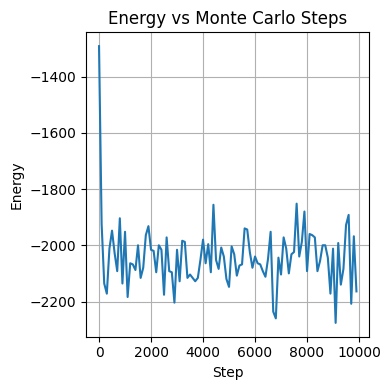

In [ ]:
rows,cols = 50,50
T = 3
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.figure(figsize=(4,4))
plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

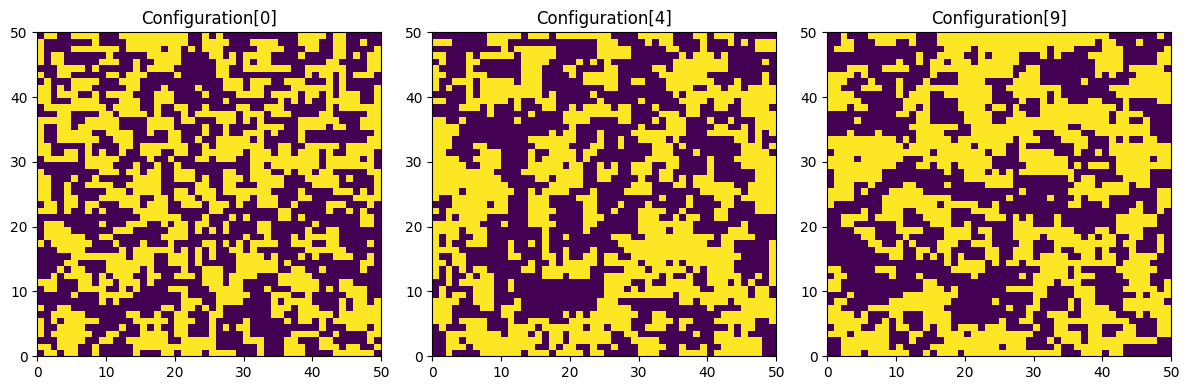

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//50x50//T=3")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//50x50//T=3")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//50x50//T=3")

plt.tight_layout()
plt.savefif('50x50//T=3')
plt.show()

In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_50 = []

for T in T_list:
  rows,cols = 50,50
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_50, A_list_50 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_50 = cal_sp_heat(T, total_energy_list_50)
  cv_list_50.append(specific_heat_50)
  print(f"T = {T:.2f}, specific heat = {specific_heat_50}")

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(T_list, cv_list_4, marker='o', linestyle='-', label = '4x4')
plt.plot(T_list, cv_list_8, marker='o', linestyle='-', label = '8x8' )
plt.plot(T_list, cv_list_12, marker='o', linestyle='-', label = '12x12')
plt.plot(T_list, cv_list_50, marker='o', linestyle='-', label = '50x50')
plt.title("Specific Heat vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.legend()
plt.grid(True)
plt.savefig('4x4,8x8,12x12,50x50')
plt.show()

## T = 1.5

### 4x4

In [ ]:
rows,cols = 4,4
T = 1.5
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//4x4//T=1.5")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//4x4//T=1.5")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//4x4//T=1.5")

plt.tight_layout()
plt.savefig('4x4//T=1.5')
plt.show()

In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_32 = []

for T in T_list:
  rows,cols = 4,4
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_32, A_list_32 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_32 = cal_sp_heat(T, total_energy_list_32)
  cv_list_50.append(specific_heat_32)
  print(f"T = {T:.2f}, specific heat = {specific_heat_32}")

### 8x8

In [ ]:
rows,cols = 8,8
T = 1.5
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//8x8//T=1.5")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//8x8//T=1.5")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//8x8//T=1.5")

plt.tight_layout()
plt.savefig('8x8//T=1.5')
plt.show()

In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_32 = []

for T in T_list:
  rows,cols = 8,8
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_32, A_list_32 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_32 = cal_sp_heat(T, total_energy_list_32)
  cv_list_50.append(specific_heat_32)
  print(f"T = {T:.2f}, specific heat = {specific_heat_32}")

### 12x12

In [ ]:
rows,cols = 12,12
T = 1.5
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//12x12//T=1.5")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//12x12//T=1.5")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//12x12//T=1.5")

plt.tight_layout()
plt.savefig('12x12//T=1.5')
plt.show()

In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_32 = []

for T in T_list:
  rows,cols = 12,12
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_32, A_list_32 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_32 = cal_sp_heat(T, total_energy_list_32)
  cv_list_50.append(specific_heat_32)
  print(f"T = {T:.2f}, specific heat = {specific_heat_32}")

### 50x50

In [ ]:
rows,cols = 50,50
T = 1.5
N_steps = 10000

lattice = config(rows, cols)

total_energy_list, final_config_list = report(lattice, T, N_steps)

plt.plot(np.arange(0,N_steps, 100), total_energy_list)
plt.title("Energy vs Monte Carlo Steps")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Configuration[0]//50x50//T=1.5")
plt.pcolor(final_config_list[0])

plt.subplot(1,3, 2)
plt.title("Configuration[4]//50x50//T=1.5")
plt.pcolor(final_config_list[4])


plt.subplot(1,3, 3)
plt.pcolor(final_config_list[9])
plt.title("Configuration[9]//50x50//T=1.5")

plt.tight_layout()
plt.savefig('50x50//T=1.5')
plt.show()

In [ ]:
T_list = np.linspace(0.5, 5, 20)
cv_list_32 = []

for T in T_list:
  rows,cols = 50,50
  N_steps = N_step_eq = 10000
  N_steps_report = 20000
  lattice = config(rows, cols)

  for _ in range(N_step_eq):
    monte_carlo(lattice, T)

  total_energy_list_32, A_list_32 = report(lattice, T, N_steps = N_steps_report)

  specific_heat_32 = cal_sp_heat(T, total_energy_list_32)
  cv_list_50.append(specific_heat_32)
  print(f"T = {T:.2f}, specific heat = {specific_heat_32}")